# [IAPR 2019:][iapr2019] Special project

**Group members:**
    1- Urvan Christen,
    2- Baptiste Hériard-Dubreuil,
    3- Jean-Baptiste Membrado

**Due date:** 30.05.2019

[iapr2019]: https://github.com/LTS5/iapr-2019


## Description
Please find the description of this special project via [this link].

[this link]: https://github.com/LTS5/iapr-2019/blob/master/project/special_project_description.pdf

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import xml.etree.ElementTree as ET
import skimage

DATA_DIR = "project-data/"
IMAGES_DIR = "project-data/images/"
ANNOTATIONS_DIR = "project-data/annotations/"

In [169]:
def get_names(addresses_file):
    """
    Gathers the names of the dataset items contained in the given addresses file.
    Inputs:
        - addresses_file: file containing the names of the dataset items
    Output:
        - list of names of dataset items.
    """
    f = open(addresses_file, "r")
    return [name.strip() for name in f.readlines()]

def get_images(names, dir_path = IMAGES_DIR):
    """
    Gathers the images of the dataset items contained with given names contained in a given directory
    Inputs:
        - names: list of the names of the images to gather.
        - dir_path: directory containing the images.
    Output:
        - {name: image_array} like dictionary of images.
    """
    return {name: skimage.io.imread(dir_path + name + ".jpg") for name in names}

def parse_file(filename):
    """ Parse a PASCAL VOC xml file """
    tree = ET.parse(filename)
    objects = []
    for obj in tree.findall('object'):
        obj_struct = {}
        obj_struct['name'] = obj.find('name').text
        bbox = obj.find('bndbox')
        obj_struct['bbox'] = [int(float(bbox.find('xmin').text)),
                              int(float(bbox.find('ymin').text)),
                              int(float(bbox.find('xmax').text))-int(float(bbox.find('xmin').text)),
                              int(float(bbox.find('ymax').text))-int(float(bbox.find('ymin').text))]
        objects.append(obj_struct)

    return objects

def get_annotations(names, dir_path = ANNOTATIONS_DIR):
    """
    Gathers the annotations of the dataset items contained with given names contained in a given directory
    Inputs:
        - names: list of the names of the annotations to gather.
        - dir_path: directory containing the annotations.
    Output:
        - {name: annotations_object} like dictionary of annotations.
    """
    return {name: parse_file(dir_path + name + ".xml") for name in names}

def plot_annotations(ax, annotations):
    """
    Plots the annotaions on the AxesSubplot object.
    Inputs:
        - ax: where to plot the annotaions.
        - annotations: annotations objects to plot.
    Output:
    """
    for anno in annotations:
        rect = patches.Rectangle((anno['bbox'][0], anno['bbox'][1]), anno['bbox'][2], anno['bbox'][3],
                linewidth=1,edgecolor='r',facecolor='none')
        ax.add_patch(rect)
        
def plot_bboxes(ax, bboxes, **kwargs):
    """
    Plots the annotaions on the AxesSubplot object.
    Inputs:
        - ax: where to plot the annotaions.
        - annotations: annotations objects to plot.
    Output:
    """
    kwargs["linewidth"] = kwargs.setdefault("linewidth", 1)
    kwargs["edgecolor"] = kwargs.setdefault("edgecolor", 'r')
    kwargs["facecolor"] = kwargs.setdefault("facecolor", "none")
    
    for bbox in bboxes:
        rect = patches.Rectangle((bbox[0], bbox[1]), bbox[2] - bbox[0], bbox[3] - bbox[1],
                **kwargs)
        ax.add_patch(rect)

def get_mask(img, annotations):
    """
    Gathers the mask of the image marking the annotated bounding boxes.
    Input:
        - img: image to mask (just for the shape)
        - annotations: bounding boxes objects to mark
    Output:
        - binary array of same shape as input image containing True wherever a bounding box is.
    """
    mask = np.zeros(img.shape[:2], "bool")
    for anno in annotations:
        mask[anno['bbox'][1]:anno['bbox'][1] + anno['bbox'][3], anno['bbox'][0]:anno['bbox'][0] + anno['bbox'][2]] = True
    return mask

def get_bboxes(annotations):
    """
    Gathers the annotated bounding boxes.
    Input:
        - annotations: bounding boxes objects to extract
    Output:
        - list of [min_y, min_x, max_y, max_x] bounding boxes (y is the column index)
    """
    return [[anno['bbox'][1], 
             anno['bbox'][0], 
             anno['bbox'][1] + anno['bbox'][3], 
             anno['bbox'][0] + anno['bbox'][2]] for anno in annotations]

def minMaxBbox_to_sizeBbox(minMaxBbox):
    """
    Converts a [x_min, y_min, x_max, y_max] bbox to a [x, y, width, height] bbox.
    """
    return [minMaxBbox[0], minMaxBbox[1], minMaxBbox[2] - minMaxBbox[0], minMaxBbox[3] - minMaxBbox[1]]

def sizeBbox_to_minMaxBbox(sizeBbox):
    """
    Converts a [x, y, width, height] to a bbox [x_min, y_min, x_max, y_max] bbox .
    """
    return [sizeBbox[0], sizeBbox[1], sizeBbox[2] + sizeBbox[0], sizeBbox[3] + sizeBbox[1]]

In [170]:
# Gathers the names of the training dataset items
TRAINING_NAMES = get_names(DATA_DIR + "train.txt")
for name in TRAINING_NAMES[:5]:
    print(name)

5a4a025ca07d567e7d04bed7_32.00px_10
5a90628ea07d569183acf22b_32.00px_5
5984d23b579e529fdea8af09_32.00px_1
5a0de18fa07d56baef59b1f8_32.00px_11
5a3d5aeca07d567e7d04bea8_32.00px_3


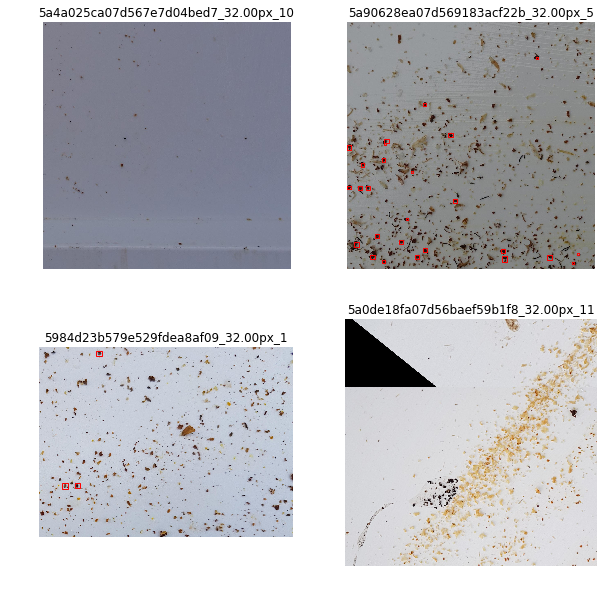

In [171]:
# Gathers some images
TRAINING_IMAGES = get_images(TRAINING_NAMES[:12], IMAGES_DIR + "train/")
TRAINING_ANNOTATIONS = get_annotations(TRAINING_NAMES[:12], ANNOTATIONS_DIR + "train/")

(nrows, ncols) = (2, 2)

# Plots the images and annotations
fig, ax = plt.subplots(nrows, ncols, figsize = (5 * ncols, 5 * nrows))
k = 0
for i in range(nrows):
    for j in range(ncols):
        name = TRAINING_NAMES[k]
        ax[i, j].imshow(TRAINING_IMAGES[name])
        plot_annotations(ax[i, j], TRAINING_ANNOTATIONS[name])
        ax[i, j].axis('off')
        ax[i, j].set_title(name)
        k += 1
plt.show()

## Part 1: Finding varroas by segmentation
Add your implementation for ''**detect_by_segmentation**'' function. Please make sure the input and output follows the mentioned format.

In [172]:
def show_histogram(img, mask, channel=0):
    """
    Shows histogram of input image on given channel
    Input: 
        - img: image to analyze
        - mask: binary array of same shape as img containing the positions of positive class pixels
        - channel: (int) channel (RGB) to consider
    Output: 
        - shows the histogram of pixels for positive and negative pixels.
    """
    pixels_mask = img[:, :, channel][ mask]
    pixels_comp = img[:, :, channel][~mask]
    
    plt.hist(pixels_mask, density=True, bins=100, alpha=0.5)
    plt.hist(pixels_comp, density=True, bins=100, alpha=0.5)
    
    plt.show()
    
def show_histogram2d(img, mask, channels=(0, 1)):
    """
    Shows 2D-histogram of input image on given channels
    Input: 
        - img: image to analyze
        - mask: binary array of same shape as img containing the positions of positive class pixels
        - channels: (int, int) channels (RGB) to consider
    Output: 
        - shows the 2D-histogram of pixels for positive and negative pixels.
    """
    pixels_mask0 = img[:, :, channels[0]][ mask]
    pixels_comp0 = img[:, :, channels[0]][~mask]
    
    pixels_mask1 = img[:, :, channels[1]][ mask]
    pixels_comp1 = img[:, :, channels[1]][~mask]
    
    fig, ax = plt.subplots(ncols=2, figsize=(10, 5))
    ax[0].hist2d(pixels_mask0, pixels_mask1, bins=100)
    ax[1].hist2d(pixels_comp0, pixels_comp1, bins=100)
    
    plt.show()

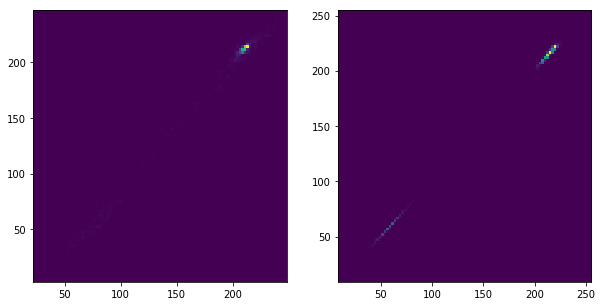

In [173]:
name = TRAINING_NAMES[5]
img = TRAINING_IMAGES[name]
annotations = TRAINING_ANNOTATIONS[name]
mask = get_mask(img, annotations)
show_histogram2d(img, mask, (0, 1))

In [174]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

import skimage.io
from skimage import data
from skimage.filters import threshold_otsu
from skimage.segmentation import clear_border
from skimage.measure import label
from skimage.morphology import closing, square
from skimage.measure import regionprops
from skimage.color import label2rgb


import cv2 as cv

# We based this implementation on what we did in Lab 1 for varroae detection

def detect_by_segmentation(image):
    '''
    Input: One single image
    Output: A numpy array containing coordonates of all detected varroas, with the following format: 
            [[x_1, y_1, w_1, h_2], [x_2, y_2, w_1, h_2], ..., [x_n, y_n, w_n, h_n]] 
            where ''n'' is the number of detected varroas.
    '''
    
    label_image = label_by_segmentation(image)
    list_boxes = create_boxes(image, label_image)
    return [minMaxBbox_to_sizeBbox(bbox) for bbox in list_boxes]

def label_by_segmentation(image):
    '''
    Input: One single image
    Output: One single image containing labeled zones where potential varroas are located
    '''
    # apply threshold
    blur = cv.blur(image,(3,3))
    _, thresh = cv.threshold(blur,100,255,cv.THRESH_BINARY_INV)
    bw = closing(skimage.color.rgb2gray(thresh) > 0.5, square(2))

    # remove artifacts connected to image border
    cleared = bw.copy()
    clear_border(cleared)

    # label image regions
    label_image = label(cleared)
    
    return label_image

In [175]:
def create_boxes(image, label_image):
    """
    Creates boxes containing varroas location based on labeled image. Removes those too small or too large.
    Input: 
        - image: image to analyze
        - label_image: labeled positions of potential varroas
    Output: 
        - list of bounding boxes (min max) of potential varroas
    """
    list_boxes = []
    
    image_label_overlay = label2rgb(label_image, image=image)
    
    for region in regionprops(label_image):
        # skip the too small or too big boxes
        if region.area > 250 and region.area < 1000 and region.major_axis_length < 50:
            # draw rectangle around segmented coins
            minr, minc, maxr, maxc = region.bbox
            list_boxes.append([minc, minr, maxc, maxr])

    return list_boxes

In [176]:
def get_overlap_bbox(bboxA, bboxB):
    """
    Compute the overlap area between two bounding boxes
    Input: 
        - bboxA: bounding box (min max)
        - bboxB: bounding box (min max)
    Output: 
        - area of overlap
    """
    return max(0, min(bboxA[2], bboxB[2]) - max(bboxA[0], bboxB[0])) *\
        max(0, min(bboxA[3], bboxB[3]) - max(bboxA[1], bboxB[1]))

def get_overlap_bboxes(bboxes_A, bboxes_B):
    """
    Compute pairwise overlap area between two bounding boxes
    Input: 
        - bboxes_A: bounding box list (min max)
        - bboxes_B: bounding box list (min max)
    Output: 
        - 2D-array containing areas of overlap: overlap[i, j] contains overlap between bboxes_A[i] and bboxes_B[j]
    """
    return np.array([[get_overlap_bbox(bbA, bbB) for bbB in bboxes_B] for bbA in bboxes_A])

def get_area_bbox(bbox):
    """
    Compute the area of a bounding box
    Input: 
        - bbox: bounding box (min max)
    Output: 
        - area of bounding box
    """
    return (bbox[2] - bbox[0]) * (bbox[3] - bbox[1])

def get_IoU_bboxes(bboxes_A, bboxes_B):
    """
    Compute pairwise IoU area between two bounding boxes. IoU is defined as the ratio between overlap area and union area
    Input: 
        - bboxes_A: bounding box list (min max)
        - bboxes_B: bounding box list (min max)
    Output: 
        - 2D-array containing areas of IoU: IoU[i, j] contains IoU between bboxes_A[i] and bboxes_B[j]
    """
    areasA = [get_area_bbox(bbA) for bbA in bboxes_A]
    areasB = [get_area_bbox(bbB) for bbB in bboxes_B]
    
    # Compute (AiB)/(AuB) as (AiB)/(A + B - AiB) where i is the intersection and u the union
    return np.array([[get_overlap_bbox(bbA, bbB) / (areaA + areaB - get_overlap_bbox(bbA, bbB)) \
             for (bbB, areaB) in zip(bboxes_B, areasB)]\
            for (bbA, areaA) in zip(bboxes_A, areasA)])

def get_IoU_ref_score(bboxes_ref, bboxes_obs):
    """
    Compute IoU area of the best observed bbox for each reference bounding box.
    Input: 
        - bboxes_ref: reference bounding box list (min max)
        - bboxes_obs: observed  bounding box list (min max)
    Output: 
        - array containing the best IoU score for each reference bbox.
    """
    IoU = get_IoU_bboxes(bboxes_ref, bboxes_obs)
    if IoU.size == 0: return np.zeros(len(bboxes_ref))
    return np.max(IoU, axis=1)

def get_IoU_obs_score(bboxes_ref, bboxes_obs):
    """
    Compute IoU area of the best reference bbox for each observed bounding box.
    Input: 
        - bboxes_ref: reference bounding box list (min max)
        - bboxes_obs: observed  bounding box list (min max)
    Output: 
        - array containing the best IoU score for each observed bbox.
    """
    IoU = get_IoU_bboxes(bboxes_ref, bboxes_obs)
    if IoU.size == 0: return np.zeros(len(bboxes_obs))
    return np.max(IoU, axis=0)

def get_confusion_matrix(bboxes_ref, bboxes_obs, th=0.3):
    """
    Compute the confusion matrix based on reference and observed bounding boxes.
    Input: 
        - bboxes_ref: reference bounding box list (min max)
        - bboxes_obs: observed  bounding box list (min max)
    Output: 
        - confusion matrix. 
        [tp, fn]
        [fp, tn]
    """
    IoU = get_IoU_bboxes(bboxes_ref, bboxes_obs)
    if IoU.size == 0: obs_score = np.zeros(len(bboxes_obs))
    else: obs_score = np.max(IoU, axis=0)
        
    if IoU.size == 0: ref_score = np.zeros(len(bboxes_ref))
    else: ref_score = np.max(IoU, axis=1)
    tp = np.sum(ref_score > th)
    return np.array([[tp, len(ref_score) - tp], [len(obs_score) - tp, 0]])

def get_precision(bboxes_ref, bboxes_obs, th=0.3):
    """
    Compute the precision score based on reference and observed bounding boxes.
    Input: 
        - bboxes_ref: reference bounding box list (min max)
        - bboxes_obs: observed  bounding box list (min max)
    Output: 
        - precision score (tp / (tp + fp))
    """
    cm = get_confusion_matrix(bboxes_ref, bboxes_obs, th=0.3)
    return (cm[0, 0] / (cm[0, 0] + cm[1, 0]))
            
            
def get_recall(bboxes_ref, bboxes_obs, th=0.3):
    """
    Compute the recall score based on reference and observed bounding boxes.
    Input: 
        - bboxes_ref: reference bounding box list (min max)
        - bboxes_obs: observed  bounding box list (min max)
    Output: 
        - recall score (tp / (tp + fn))
    """
    cm = get_confusion_matrix(bboxes_ref, bboxes_obs, th=0.3)
    return (cm[0, 0] / (cm[0, 0] + cm[0, 1]))


def get_F1(bboxes_ref, bboxes_obs, th=0.3):
    """
    Compute the F1 score based on reference and observed bounding boxes.
    Input: 
        - bboxes_ref: reference bounding box list (min max)
        - bboxes_obs: observed  bounding box list (min max)
    Output: 
        - F1 score (tp / (tp + fn))
    """
    precision = get_precision(bboxes_ref, bboxes_obs, th=0.3)
    recall = get_recall(bboxes_ref, bboxes_obs, th=0.3)
    return 2 * precision * recall / (precision + recall)

C:\ProgramData\Anaconda3\lib\site-packages\skimage\measure\_regionprops.py:250: UserWarning: regionprops and image moments (including moments, normalized moments, central moments, and inertia tensor) of 2D images will change from xy coordinates to rc coordinates in version 0.16.
See http://scikit-image.org/docs/0.14.x/release_notes_and_installation.html#deprecations for details on how to avoid this message.
  warn(XY_TO_RC_DEPRECATION_MESSAGE)
C:\ProgramData\Anaconda3\lib\site-packages\skimage\measure\_regionprops.py:260: UserWarning: regionprops and image moments (including moments, normalized moments, central moments, and inertia tensor) of 2D images will change from xy coordinates to rc coordinates in version 0.16.
See http://scikit-image.org/docs/0.14.x/release_notes_and_installation.html#deprecations for details on how to avoid this message.
  warn(XY_TO_RC_DEPRECATION_MESSAGE)


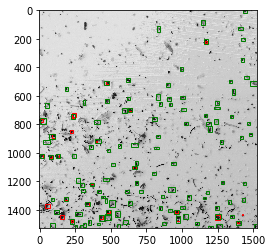

117 26
[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.]


In [177]:
img_name = '5a90628ea07d569183acf22b_32.00px_5'
test_img = TRAINING_IMAGES[img_name]

img_gray = skimage.color.rgb2gray(test_img)
output = label_by_segmentation(test_img)

list_boxes = create_boxes(img_gray, output)
expected_boxes = get_bboxes(TRAINING_ANNOTATIONS[img_name])

fig, ax = plt.subplots(1, 1)
ax.imshow(img_gray,cmap="gray")
plot_annotations(ax, TRAINING_ANNOTATIONS[img_name])
plot_bboxes(ax, list_boxes, edgecolor="g")
plt.show()

print(len(list_boxes), len(expected_boxes))

print(get_IoU_ref_score(expected_boxes, list_boxes))
#plot_detection(img_gray, output, list_boxes)

In [178]:
# Compute the precision and recall scores for several images.
for name in TRAINING_NAMES[:12]:
    test_img = TRAINING_IMAGES[name]

    img_gray = skimage.color.rgb2gray(test_img)
    output = label_by_segmentation(test_img)

    list_boxes = create_boxes(img_gray, output)
    expected_boxes = get_bboxes(TRAINING_ANNOTATIONS[name])
    
    print("image: {} precision:{:.3f} recall:{:.3f} F1:{:.3f}".format(name,
                                                           get_precision(expected_boxes, list_boxes),
                                                           get_recall(expected_boxes, list_boxes),
                                                           get_F1(expected_boxes, list_boxes)))

C:\ProgramData\Anaconda3\lib\site-packages\skimage\measure\_regionprops.py:250: UserWarning: regionprops and image moments (including moments, normalized moments, central moments, and inertia tensor) of 2D images will change from xy coordinates to rc coordinates in version 0.16.
See http://scikit-image.org/docs/0.14.x/release_notes_and_installation.html#deprecations for details on how to avoid this message.
  warn(XY_TO_RC_DEPRECATION_MESSAGE)
C:\ProgramData\Anaconda3\lib\site-packages\skimage\measure\_regionprops.py:260: UserWarning: regionprops and image moments (including moments, normalized moments, central moments, and inertia tensor) of 2D images will change from xy coordinates to rc coordinates in version 0.16.
See http://scikit-image.org/docs/0.14.x/release_notes_and_installation.html#deprecations for details on how to avoid this message.
  warn(XY_TO_RC_DEPRECATION_MESSAGE)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:117: RuntimeWarning: invalid value enco

image: 5a4a025ca07d567e7d04bed7_32.00px_10 precision:0.000 recall:nan F1:nan


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:131: RuntimeWarning: invalid value encountered in double_scalars


image: 5a90628ea07d569183acf22b_32.00px_5 precision:0.000 recall:0.000 F1:nan
image: 5984d23b579e529fdea8af09_32.00px_1 precision:0.000 recall:0.000 F1:nan
image: 5a0de18fa07d56baef59b1f8_32.00px_11 precision:0.000 recall:nan F1:nan
image: 5a3d5aeca07d567e7d04bea8_32.00px_3 precision:0.000 recall:0.000 F1:nan
image: 59a31cbaa07d5673ec099c8b_32.00px_7 precision:0.000 recall:0.000 F1:nan
image: 5ad21210a07d5605be933dc4_32.00px_0 precision:0.000 recall:nan F1:nan
image: 5a19d440a07d5643ecfab27c_32.00px_0 precision:0.000 recall:nan F1:nan
image: 59f01b6fa07d563535ffc6d2_32.00px_1 precision:0.000 recall:0.000 F1:nan
image: 5a147495a07d56baef59b20d_32.00px_13 precision:0.000 recall:nan F1:nan
image: 5a3674f8a07d567f57e0273a_32.00px_2 precision:0.000 recall:nan F1:nan
image: 59d678cca07d5605c2118821_32.00px_0 precision:0.000 recall:0.000 F1:nan


Add your implementation. Report the Precision, Recall and F1-score, by using all 50 images of the test-set, and considering 0.3 as the IoU threshold.

We'll test our implementation on some of the training images provided

C:\ProgramData\Anaconda3\lib\site-packages\skimage\measure\_regionprops.py:250: UserWarning: regionprops and image moments (including moments, normalized moments, central moments, and inertia tensor) of 2D images will change from xy coordinates to rc coordinates in version 0.16.
See http://scikit-image.org/docs/0.14.x/release_notes_and_installation.html#deprecations for details on how to avoid this message.
  warn(XY_TO_RC_DEPRECATION_MESSAGE)
C:\ProgramData\Anaconda3\lib\site-packages\skimage\measure\_regionprops.py:260: UserWarning: regionprops and image moments (including moments, normalized moments, central moments, and inertia tensor) of 2D images will change from xy coordinates to rc coordinates in version 0.16.
See http://scikit-image.org/docs/0.14.x/release_notes_and_installation.html#deprecations for details on how to avoid this message.
  warn(XY_TO_RC_DEPRECATION_MESSAGE)


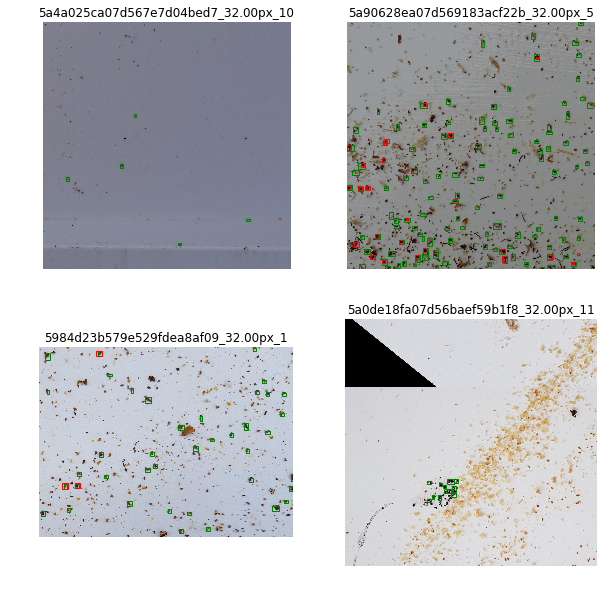

In [179]:
# Gathers some images
nmbr_img = 12

TRAINING_IMAGES = get_images(TRAINING_NAMES[:nmbr_img], IMAGES_DIR + "train/")
TRAINING_ANNOTATIONS = get_annotations(TRAINING_NAMES[:nmbr_img], ANNOTATIONS_DIR + "train/")


(nrows, ncols) = (2, 2)

# Plots the images and annotations
fig, ax = plt.subplots(nrows, ncols, figsize = (5 * ncols, 5 * nrows))
k = 0
for i in range(nrows):
    for j in range(ncols):
        name = TRAINING_NAMES[k]
        image = TRAINING_IMAGES[name]
        ax[i, j].imshow(image)
        output_labels = label_by_segmentation(image)
        predicted_annotation = create_boxes(image, output_labels)
        plot_bboxes(ax[i, j], predicted_annotation, edgecolor = 'g')
        plot_annotations(ax[i, j], TRAINING_ANNOTATIONS[name])
        ax[i, j].axis('off')
        ax[i, j].set_title(name)
        k += 1
plt.show()

## Part 2: Implement your first detector

Write your function(s) for the second part. Feel free to change the name of the function and add your additional functions, but please make sure their input and output follows the mentioned format.

In [180]:
def detect_by_method_1(img):
    '''
    Input: One single image
    Output: A numpy array containing coordonates of all detected varroas, with the following format: 
            [[x_1, y_1, w_1, h_2], [x_2, y_2, w_1, h_2], ..., [x_n, y_n, w_n, h_n]] 
            where ''n'' is the number of detected varroas.
    '''

    #Your code

Add your implementation. Report the Precision, Recall and F1-score, by using all 50 images of the test-set, and considering 0.3 as the IoU threshold.

In [181]:
#Your code

## Part 3: Using MLP and CNNs

Add your implementation for the thrid part. Feel free to add your desirable functions, but please make sure you have proper functions for the final detection, where their input and output follows the same format as the previous parts.

## Set of the sliding window parameters.

### Empirical setting of sliding windows size

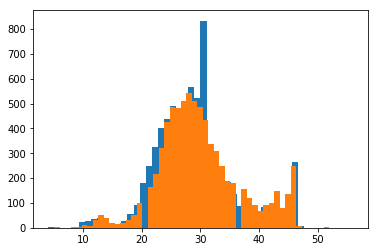

In [182]:
#Your code
TRAINING_ANNOTATIONS = get_annotations(TRAINING_NAMES, ANNOTATIONS_DIR + "train/")
dx = [anno['bbox'][2] for (name, annotations) in TRAINING_ANNOTATIONS.items() for anno in annotations]
dy = [anno['bbox'][3] for (name, annotations) in TRAINING_ANNOTATIONS.items() for anno in annotations]

plt.hist(dx, bins=50)
plt.hist(dy, bins=50)
plt.show()

### Reformatting function

In [183]:
import tensorflow as tf

# Sliding window dimensions
sw_width = 25
sw_height = 25
channels = 3
sw_size = sw_width * sw_height * channels

# Number of labels
num_labels = 2

# step size of sliding window
step = 25

# Intersection of bounding boxes decision function.
def is_positive(bboxes, annotations_bboxes, overlap_th = 0.5):
    """
    Checks whether the bounding box contains a varroa.
    Input: 
        - bbox: bounding box to check (min max)
        - annotations_bboxes: annotation bounding box list (min max)
        - overlap_th: threshold beyond which the ratio overlap/annotation 
        area is considered as a match
    Output: 
        - boolean array asserting whether each bounding box contains a varroa
    """
    areas = np.array([min(get_area_bbox(anno), get_area_bbox(bboxes[0])) for anno in annotations_bboxes])
    label = np.any(get_overlap_bboxes(bboxes, annotations_bboxes) / areas.reshape(1, -1) > overlap_th, axis=1).reshape(-1, 1)
    return np.concatenate([label, ~label], axis = 1)


def reformat_image(image, annotations_bboxes, get_class_func = is_positive):
    """
    Reformat the image to the flattened mode and creates labels so that a 
    sliding window is said to contain a varroa if its IoU score is higher 
    than the given threshold
    """
    
    (h, w, _) = image.shape
    bboxes = [[x, y, x + sw_width, y + sw_height] for x in range(0, h - sw_height, step) for y in range(0, w - sw_width, step)]
    
    return np.array([image[bb[0]:bb[2], bb[1]:bb[3], :].reshape(-1) for bb in bboxes]), is_positive(bboxes, annotations_bboxes)

def reformat_dataset(images, annotations, get_class_func = is_positive):
    reshaped_dataset_and_labels = [reformat_image(image, annotation, get_class_func) for (image, annotation) in zip(images, annotations)]
    reshaped_dataset = np.concatenate([r_data for (r_data, r_lab) in reshaped_dataset_and_labels], axis = 0)
    reshaped_labels = np.concatenate([r_lab for (r_data, r_lab) in reshaped_dataset_and_labels])
    return np.asarray(reshaped_dataset, dtype=np.float32), np.asarray(reshaped_labels, dtype=np.float32)
    
    

Test:

Compute the bounding boxes of the sliding windows and check whether a varroa is in ths sliding window.

number of sliding windows in each class [   6 3404]


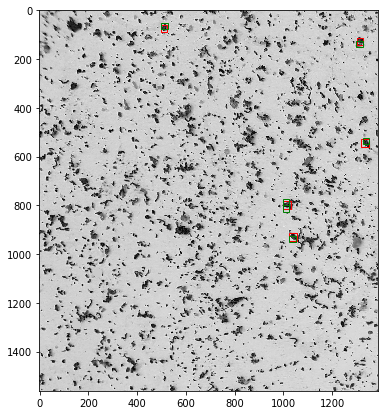

In [205]:
# Test on an image
img_name = TRAINING_NAMES[11]
image = TRAINING_IMAGES[img_name]
annotations = [sizeBbox_to_minMaxBbox(anno['bbox']) for anno in TRAINING_ANNOTATIONS[img_name]]

(h, w, _) = image.shape

# Compute the sliding windows
bboxes = [[x, y, x + sw_width, y + sw_height] for x in range(0, h - sw_height, step) for y in range(0, w - sw_width, step)]
print("number of sliding windows in each class", np.sum(is_positive(bboxes, annotations, overlap_th = 0.5), axis=0))

## Plots matching sliding windows
fig, ax = plt.subplots(1, 1, figsize=(7, 7))
ax.imshow(img_gray,cmap="gray")
plot_annotations(ax, TRAINING_ANNOTATIONS[img_name])
plot_bboxes(ax, [bbox for bbox, p in zip(bboxes, is_positive(bboxes, annotations, overlap_th = 0.5)) if p[0]], edgecolor="g")
plt.show()

In [206]:
# Import n images as training images
n = 50
TRAINING_IMAGES = get_images(TRAINING_NAMES[:n], IMAGES_DIR + "train/")
TRAINING_ANNOTATIONS = get_annotations(TRAINING_NAMES[:n], ANNOTATIONS_DIR + "train/")

TESTING_IMAGES = get_images(TRAINING_NAMES[n:n+3], IMAGES_DIR + "train/")
TESTING_ANNOTATIONS = get_annotations(TRAINING_NAMES[n:n+3], ANNOTATIONS_DIR + "train/")

# Computes the annotations for each image as minmax bounding boxes.
annotations = [[sizeBbox_to_minMaxBbox(anno['bbox']) for anno in TRAINING_ANNOTATIONS[img_name]] for img_name in TRAINING_ANNOTATIONS]

# Reformat training images and labels
train_data, train_labels = reformat_dataset(TRAINING_IMAGES.values(), annotations)
print(train_data.shape, train_labels.shape)
print("{:.4f}% of positive labels".format(100 * np.sum(train_labels, axis=0)[0] / train_labels.shape[0]))

# computes the annotations for test images
annotations = [[sizeBbox_to_minMaxBbox(anno['bbox']) for anno in TESTING_ANNOTATIONS[img_name]] for img_name in TESTING_ANNOTATIONS]

# Reformat test images
test_data, test_labels = reformat_dataset(TESTING_IMAGES.values(), annotations)
print(test_data.shape, test_labels.shape)

(232320, 1875) (232320, 2)
0.1265% of positive labels
(15293, 1875) (15293, 2)


## A problem somewhere in the sliding windows.

(294,)


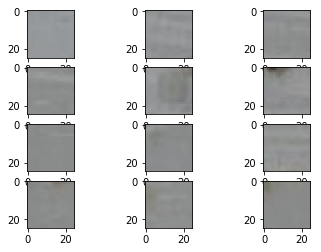

In [204]:
# Show positive sliding windows
indexes = np.where(train_labels[:, 0] > 0.5)[0]
print(indexes.shape)
fig, ax = plt.subplots(4, 3)
for i in range(4):
    for j in range(3):
        ax[i, j].imshow(train_data[indexes[i * 3 + j], :].reshape((sw_height, sw_width, 3)) / 255)
plt.show()

## Creation of the MLP

In [135]:
# Create a new graph
GRAPH = tf.Graph()

# Register the graph as the default one to add nodes.
with GRAPH.as_default():
    # PLACEHOLDERS
    TF_TRAIN_DATASET = tf.placeholder(tf.float32, shape=(None, sw_size))
    TF_TRAIN_LABELS = tf.placeholder(tf.float32, shape = (None, num_labels))
    TF_TEST_DATASET = tf.constant(test_data)
    
    with tf.name_scope("Linear_model"):
        
        """
           Initialize weights and biases
        """
        
        WEIGHTS = tf.Variable(tf.random_normal(shape=[sw_size, num_labels], stddev=0.1))
        BIASES = tf.Variable(tf.zeros([num_labels]))
    
        """
           Compute the logits WX + b
        """ 
        TRAIN_LOGITS = tf.matmul(TF_TRAIN_DATASET, WEIGHTS) + BIASES
        TEST_LOGITS = tf.matmul(TF_TEST_DATASET, WEIGHTS) + BIASES
    
        """
           Softmax function
        """   
        TRAIN_PREDICTION = tf.nn.softmax(TRAIN_LOGITS)
        TEST_PREDICTION = tf.nn.softmax(TEST_LOGITS)
    
        """
           Cost-function
        """
        CROSS_ENTROPY= tf.nn.softmax_cross_entropy_with_logits_v2(logits=TRAIN_LOGITS, labels=TF_TRAIN_LABELS)
        COST= tf.reduce_mean(CROSS_ENTROPY)
        # Optimizer
        OPTIMIZER = tf.train.GradientDescentOptimizer(learning_rate=0.5).minimize(COST)

In [136]:
def accuracy(predictions, labels):
    """
        Divides the number of true predictions to the number of total predictions
    """
    return (100.0 * np.sum(np.argmax(predictions, 1) == np.argmax(labels, 1)) / predictions.shape[0])

def recall(predictions, labels):
    """
        Divides the number of true predictions to the number of total trues
    """
    return (100.0 * np.sum((np.argmax(predictions, 1) == np.argmax(labels, 1)) & (np.argmax(labels, 1) == 0)) / np.sum(labels[:, 0] > 0.5))


In [137]:
batch_size = 3000
num_iterations = 5000

In [138]:
with tf.Session(graph=GRAPH) as session:
    """
        Start the above variable initialization
    """
    tf.initialize_all_variables().run()
    print("Variables initialized")

    for step in range(num_iterations):
        """
            Generate a random base and then generate a minibatch
        """
        BATCH_INDEXES = np.random.choice(train_labels.shape[0], batch_size, replace=False)
        BATCH_DATA = train_data[BATCH_INDEXES, :]
        BATCH_LABELS = train_labels[BATCH_INDEXES, :]
        """
            Feed the current session with batch data
        """
        FEED_DICT = {TF_TRAIN_DATASET: BATCH_DATA, TF_TRAIN_LABELS: BATCH_LABELS}
        _, l, predictions = session.run([OPTIMIZER, COST, TRAIN_PREDICTION], feed_dict=FEED_DICT)

        if(step % 500 == 0):
            print("Minibatch loss at step ", step, ": ", l)
            print("Minibatch accuracy: {:.2f}%\t Minibatch recall: {:.2f}%".format(accuracy(predictions, BATCH_LABELS), recall(predictions, BATCH_LABELS)))
            
        if (step == num_iterations-1):
            print("Test accuracy: ", accuracy(TEST_PREDICTION.eval(), test_labels))

Variables initialized
Minibatch loss at step  0 :  1.39154
Minibatch accuracy: 99.80%	 Minibatch recall: 0.00%
Minibatch loss at step  500 :  18468.7
Minibatch accuracy: 99.90%	 Minibatch recall: 0.00%
Minibatch loss at step  1000 :  23535.4
Minibatch accuracy: 99.93%	 Minibatch recall: 0.00%
Minibatch loss at step  1500 :  12477.2
Minibatch accuracy: 99.83%	 Minibatch recall: 0.00%
Minibatch loss at step  2000 :  17114.7
Minibatch accuracy: 99.93%	 Minibatch recall: 0.00%
Minibatch loss at step  2500 :  9124.44
Minibatch accuracy: 99.87%	 Minibatch recall: 0.00%
Minibatch loss at step  3000 :  34382.0
Minibatch accuracy: 99.87%	 Minibatch recall: 0.00%
Minibatch loss at step  3500 :  5947.49
Minibatch accuracy: 99.90%	 Minibatch recall: 0.00%
Minibatch loss at step  4000 :  19517.0
Minibatch accuracy: 99.93%	 Minibatch recall: 0.00%
Minibatch loss at step  4500 :  2390.73
Minibatch accuracy: 99.87%	 Minibatch recall: 0.00%
Test accuracy:  99.9280716668


## Issues : 
To many non-varroa training data.
Should probably affect a weight on varroa-positive class in order to penalize false negatives...

## Challenge

You can generate a json submission file by using the function ''**generate_pred_json**''. This prediction file can be uploaded online for evaluation (Please refer to section 3 of the project description for more details).

In [20]:
import numpy as np
import json

def generate_pred_json(data, tag='baseline'):
    '''
    Input
    - data: Is a dictionary d, such that:
          d = { 
              "ID_1": [], 
              "ID_2": [[x_21, y_21, w_21, h_21], [x_22, y_22, w_22, h_22]], 
              ... 
              "ID_i": [[x_i1, y_i1, w_i1, h_i1], ..., [x_iJ, y_iJ, w_iJ, h_iJ]],
              ... 
              "ID_N": [[x_N1, y_N1, w_N1, h_N1]],
          }
          where ID is the string id of the image (e.i. 5a05e86fa07d56baef59b1cb_32.00px_1) and the value the Kx4 
          array of intergers for the K predicted bounding boxes (e.g. [[170, 120, 15, 15]])
    - tag: (optional) string that will be added to the name of the json file.
    Output
      Create a json file, "prediction_[tag].json", conatining the prediction to EvalAI format.
    '''
    unvalid_key = []
    _data = data.copy()
    for key, value in _data.items():
        try:
            # Try to convert to numpy array and cast as closest int
            print(key)
            v = np.around(np.array(value)).astype(int)
            # Check is it is a 2d array with 4 columns (x,y,w,h)
            if v.ndim != 2 or v.shape[1] != 4:
                unvalid_key.append(key)
            # Id must be a string
            if not isinstance(key, str):
                unvalid_key.append(key)
            _data[key] = v.tolist()
        # Deal with not consistant array size and empty predictions
        except (ValueError, TypeError):
            unvalid_key.append(key)
    # Remove unvalid key from dictionnary
    for key in unvalid_key: del _data[key]
    
    with open('prediction_{}.json'.format(tag), 'w') as outfile:
        json.dump(_data, outfile)

In [21]:
#Your code